** Seaborn 101 **

### Basics

#### import seaborn and see the version

In [1]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print(seaborn.__version__)

0.9.0


#### lineplot

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

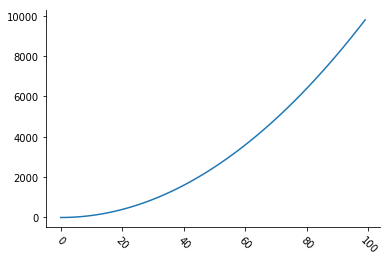

In [2]:
# Draw a line plot with possibility of several semantic groupings
x = np.arange(100)
y = x * x
sns.lineplot(x=x, y=y)
# remove spine of the figure
sns.despine(left=False, right=True, top=True, bottom=False)
plt.xticks(rotation=-45)

#### scatter plot

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


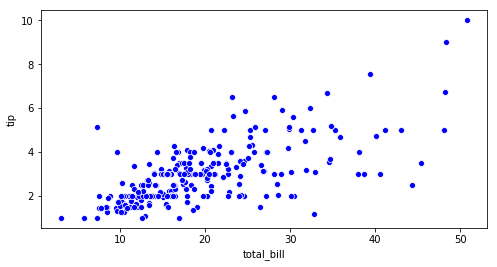

In [3]:
tips = sns.load_dataset("tips")
print(tips.head())

fig = plt.figure(figsize=(8,4))

ax = sns.scatterplot(x="total_bill", y="tip", data=tips, color='blue');

#### boxplot

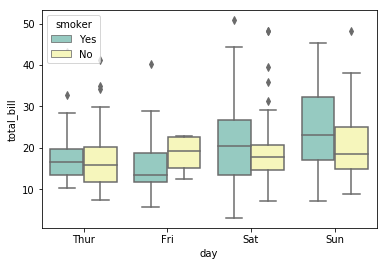

In [4]:
# Draw a box plot to show distributions with respect to categories
# boxplot的统计学意义
# sns.boxplot(x='time', y='total_bill', hue='sex', data=tips);
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3");

#### violinplot

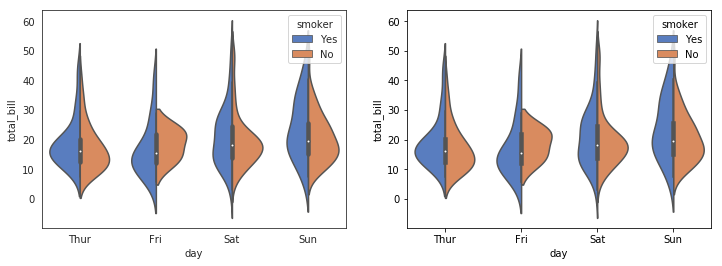

In [5]:
# Draw a combination of boxplot and kernel density estimate
fig = plt.figure(figsize=(12, 4))
with sns.axes_style("white"):
    ax = fig.add_subplot(1, 2, 1)
    sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted", split=True, ax=ax)
ax = fig.add_subplot(1, 2, 2)
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted", split=True, ax=ax);

#### swarmplot

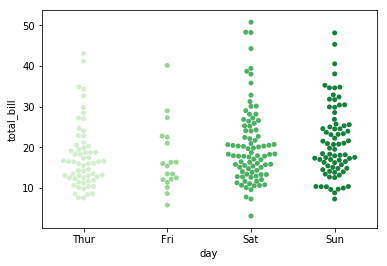

In [6]:
# Draw a categorical scatterplot with non-overlapping points
sns.swarmplot(x="day", y="total_bill", data=tips, palette='Greens', edgecolor="gray");

#### barplot

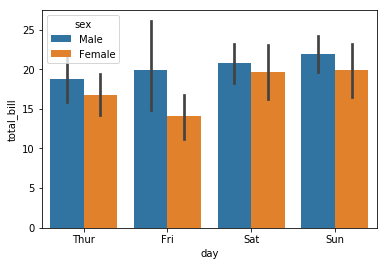

In [7]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, ci=95);

#### pointplot

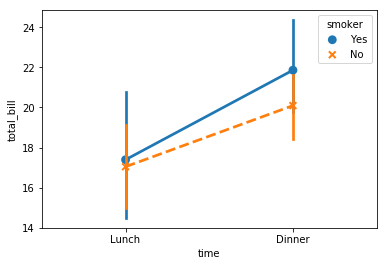

In [8]:
# Show point estimates and confidence intervals using scatter plot glyphs
sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, markers=["o", "x"], linestyles=["-", "--"]);

#### relplot (introduced in 0.9.0)

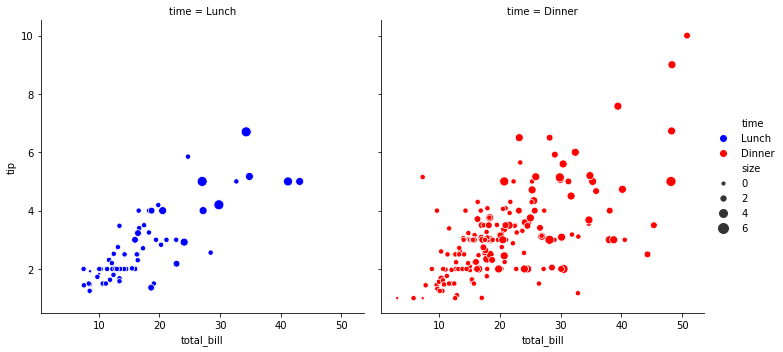

In [9]:
# Figure-level interface for drawing relational plots onto a FacetGrid
sns.relplot(x="total_bill", y="tip", hue="time", size='size', palette=["b", "r"], sizes=(10, 100), col="time", data=tips);

#### countplot

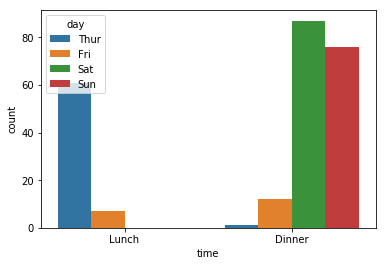

In [10]:
sns.countplot(x="time", hue="day", data=tips);

#### catplot

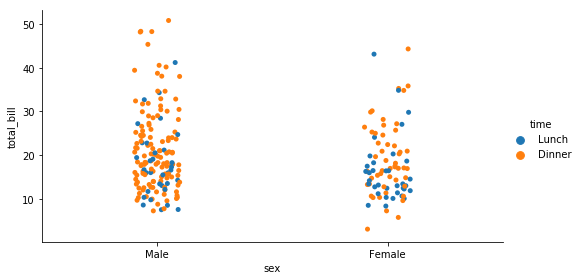

In [11]:
# Figure-level interface for drawing categorical plots onto a FacetGrid
sns.catplot(x="sex", y='total_bill', hue="time", data=tips, height=4, aspect=1.8);

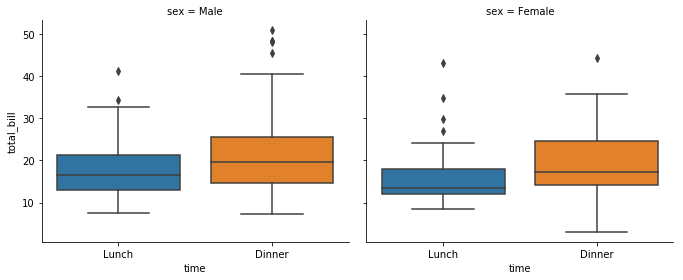

In [12]:
sns.catplot(x="time", y="total_bill", col='sex', data=tips, kind='box', height=4, aspect=1.2);

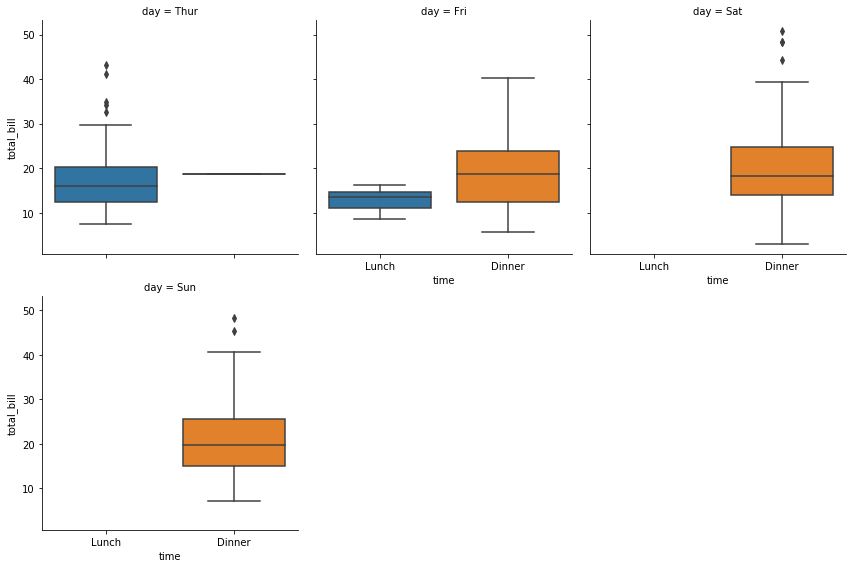

In [13]:
sns.catplot(x="time", y="total_bill", col='day', col_wrap=3, data=tips, kind='box', height=4, aspect=1.0);

#### stripplot

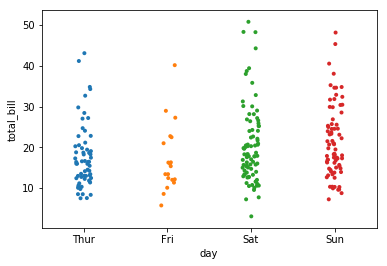

In [14]:
# Draw a scatterplot where one variable is categorical.
sns.stripplot(x="day", y="total_bill", size=4, data=tips);

#### plot heatmap

[[4.28483258e-01 8.86455836e-01 4.74259483e-04]
 [4.83203674e-01 5.77957230e-01 6.60653288e-01]
 [1.99315449e-01 9.26687231e-01 4.37868941e-01]]


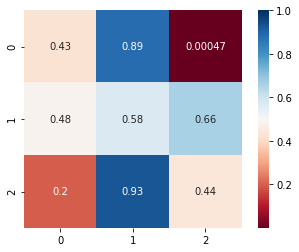

In [15]:
data = np.random.rand(3,3)
print(data)

sns.heatmap(data, annot=True, square=True, vmax=1.0, cmap="RdBu", center=0.5);

### Intermediate

#### jointsplot

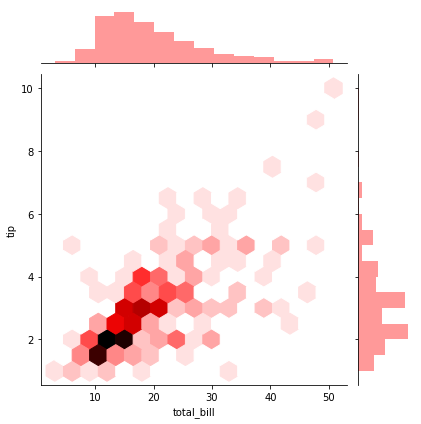

In [16]:
# Draw a plot of two variables with bivariate and univariate graphs
sns.jointplot(x="total_bill", y="tip", data=tips, height=6, kind="hex", color='red');

#### pairplot

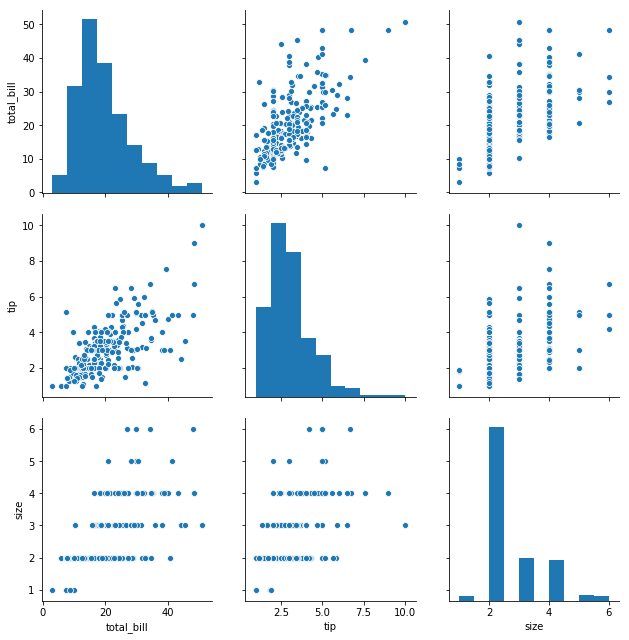

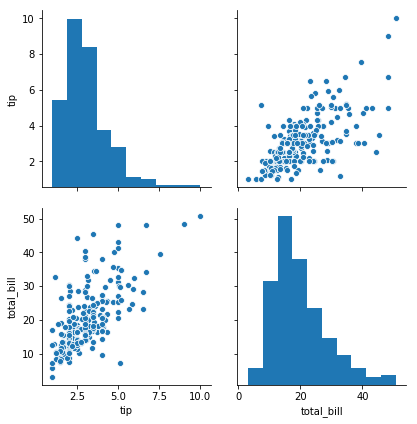

In [17]:
# Plot pairwise relationships in a dataset
sns.pairplot(tips, height=3);
sns.pairplot(tips, vars=["tip", "total_bill"], height=3);

#### distplot

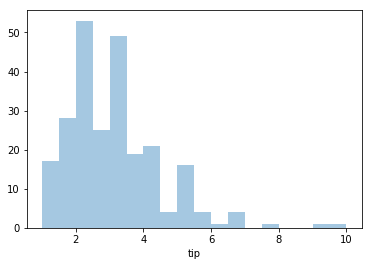

In [18]:
sns.distplot(tips['tip'], kde=False);

#### kdeplot

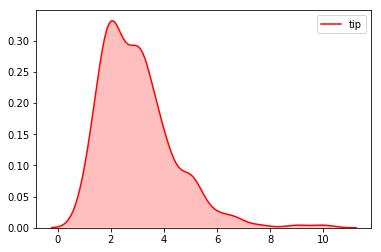

In [19]:
sns.kdeplot(tips.tip, shade=True, color="r");

#### regplot

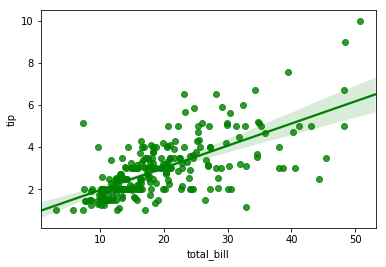

In [20]:
# Plot data and a linear regression model fit

sns.regplot(x="total_bill", y="tip", data=tips, color='g', ci=95);

#### Facetplot

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3


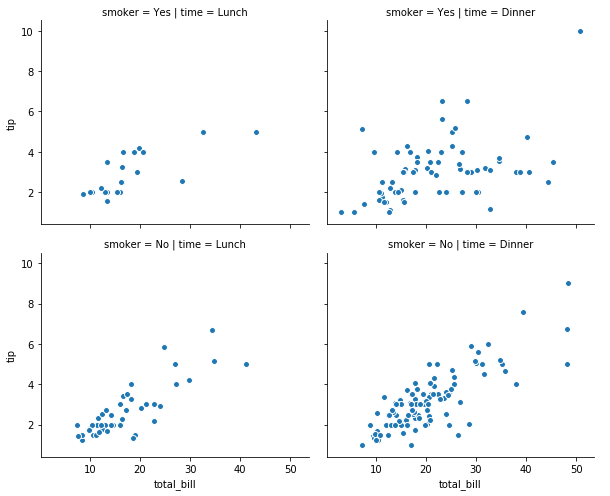

In [21]:
# Multi-plot grid for plotting conditional relationships
print(tips.head(3))

g = sns.FacetGrid(tips, col='time', row='smoker', height=3.5, aspect=1.2)
# g = g.map(plt.hist, "total_bill");
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w").add_legend())

#### plot multiple columns of pandas dataframe

   X_Axis  col_2  col_3  col_4  col_5  col_6  col_7  col_8   xx
0       1    0.4    0.7    0.1    0.5    0.5    0.2    0.2  0.4
1       3    0.5    0.8    0.3    0.3    0.3    0.6    0.8  0.5
2       5    0.4    0.9    0.5    0.6    0.2    0.6    0.3  0.2
3       7    0.5    0.4    0.7    0.9    0.7    0.8    0.5  0.8
4      10    0.5    0.2    0.1    0.2    0.5    0.4    0.7  0.6
5      20    0.4    0.3    0.0    0.4    0.1    0.3    0.3  0.3
    X_Axis   cols  vals
0        1  col_2   0.4
1        3  col_2   0.5
2        5  col_2   0.4
3        7  col_2   0.5
4       10  col_2   0.5
5       20  col_2   0.4
6        1  col_3   0.7
7        3  col_3   0.8
8        5  col_3   0.9
9        7  col_3   0.4
10      10  col_3   0.2
11      20  col_3   0.3
12       1  col_4   0.1
13       3  col_4   0.3
14       5  col_4   0.5
15       7  col_4   0.7
16      10  col_4   0.1
17      20  col_4   0.0
18       1  col_5   0.5
19       3  col_5   0.3
20       5  col_5   0.6
21       7  col_5   0.9


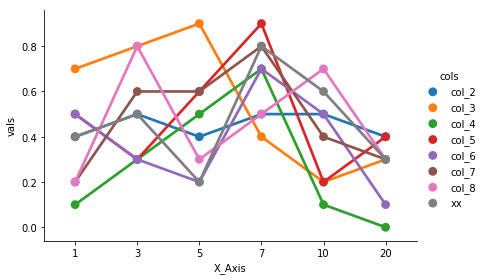

In [22]:
# https://stackoverflow.com/questions/44941082/plot-multiple-columns-of-pandas-dataframe-using-seaborn
df = pd.DataFrame({'X_Axis':[1,3,5,7,10,20],
                   'col_2':[.4,.5,.4,.5,.5,.4],
                   'col_3':[.7,.8,.9,.4,.2,.3],
                   'col_4':[.1,.3,.5,.7,.1,.0],
                   'col_5':[.5,.3,.6,.9,.2,.4],
                   'col_6':[.5,.3,.2,.7,.5,.1],
                   'col_7':[.2,.6,.6,.8,.4,.3],
                   'col_8':[.2,.8,.3,.5,.7,.3],
                   'xx':[.4,.5,.2,.8,.6,.3],
                  })

print (df)
# 有点像dataframe的groupby('X_Axis')
df = df.melt('X_Axis', var_name='cols',  value_name='vals')
print(df)
g = sns.factorplot(x="X_Axis", y="vals", hue='cols', data=df, height=4, aspect=1.5);